# Importing the neccessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
# Warning Suppression 
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [3]:
# Independent feature dataframe
X = pd.read_csv(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\X_pred_prob")

# Target feature dataframe
Y = pd.read_csv(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\Target_feature_df_1")

In [4]:
X.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Cust_Tenure,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Widow,childhome_1,childhome_2,childhome_3,Education_Basic,Education_Graduation,Education_Master,Education_PhD,pred_prob
0,58138.0,58,635,88,546,172,88,88,8,10,4,0,0,0,0,0,64.0,8.0,0,1,0,0,0,0,0,1,0,0,0.959747
1,46344.0,38,11,1,6,2,1,6,1,1,2,0,0,0,0,0,67.0,6.0,0,1,0,0,1,0,0,1,0,0,0.116699
2,71613.0,26,426,49,127,111,21,42,8,2,10,0,0,0,0,0,56.0,7.0,0,0,0,0,0,0,0,1,0,0,0.076542
3,26646.0,26,11,4,20,10,3,5,2,0,4,0,0,0,0,0,37.0,6.0,0,0,0,1,0,0,0,1,0,0,0.028384
4,58293.0,94,173,43,118,46,27,15,5,3,6,0,0,0,0,0,40.0,6.0,0,0,0,1,0,0,0,0,0,1,0.005233


In [5]:
print("The event rate is", round(Y['Response'].mean(),2),"%")

The event rate is 0.15 %


In [6]:
# Concatenating the independent and target feature into one dataframe-df
df = pd.concat([X,Y],axis=1)

In [7]:
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Cust_Tenure,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Widow,childhome_1,childhome_2,childhome_3,Education_Basic,Education_Graduation,Education_Master,Education_PhD,pred_prob,Response
0,58138.0,58,635,88,546,172,88,88,8,10,4,0,0,0,0,0,64.0,8.0,0,1,0,0,0,0,0,1,0,0,0.959747,1
1,46344.0,38,11,1,6,2,1,6,1,1,2,0,0,0,0,0,67.0,6.0,0,1,0,0,1,0,0,1,0,0,0.116699,0
2,71613.0,26,426,49,127,111,21,42,8,2,10,0,0,0,0,0,56.0,7.0,0,0,0,0,0,0,0,1,0,0,0.076542,0
3,26646.0,26,11,4,20,10,3,5,2,0,4,0,0,0,0,0,37.0,6.0,0,0,0,1,0,0,0,1,0,0,0.028384,0
4,58293.0,94,173,43,118,46,27,15,5,3,6,0,0,0,0,0,40.0,6.0,0,0,0,1,0,0,0,0,0,1,0.005233,0


In [8]:
df.shape

(2058, 30)

# Probability Decile Analysis 

##  1. Create Deciles based on the Model Probabilities
 - Divide the whole dataset into 10 equal groups 

In [9]:
df['Prob_Rank']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
df[['pred_prob','Prob_Rank']].head()

,pred_prob,Prob_Rank
0,0.959747,10
1,0.116699,5
2,0.076542,4
3,0.028384,3
4,0.005233,1


## 2. Summarize the data at Decile Level for Analysis
- Check if each group has equal number of observations

In [10]:
rank_df=df.groupby('Prob_Rank')['Response'].agg(['count','mean']).sort_values(by='Prob_Rank',ascending=False)
rank_df.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df

,count,Actual_event_rate
Prob_Rank,,
10,206,0.689320
9,206,0.383495
8,206,0.184466
7,205,0.121951
6,206,0.077670
5,206,0.033981
4,205,0.009756
3,206,0.019417
2,206,0.000000


## 3 Event Capture Analysis across Probability Deciles

In [11]:
rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
rank_df['cum_events']=rank_df['N_events'].cumsum()
rank_df['event_cap']=rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap']=rank_df['event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
Prob_Rank,,,,,,
10,206,0.689320,142.0,142.0,0.453674,0.453674
9,206,0.383495,79.0,221.0,0.252396,0.706070
8,206,0.184466,38.0,259.0,0.121406,0.827476
7,205,0.121951,25.0,284.0,0.079872,0.907348
6,206,0.077670,16.0,300.0,0.051118,0.958466
5,206,0.033981,7.0,307.0,0.022364,0.980831
4,205,0.009756,2.0,309.0,0.006390,0.987220
3,206,0.019417,4.0,313.0,0.012780,1.000000
2,206,0.000000,0.0,313.0,0.000000,1.000000


## 4 Non Event Capture Analysis across Probability Deciles

In [12]:
rank_df['N_non_events']=rank_df['count']-rank_df['N_events']
rank_df['cum_non_events']=rank_df['N_non_events'].cumsum()
rank_df['non_event_cap']=rank_df['N_non_events']/max(rank_df['N_non_events'].cumsum())
rank_df['cum_non_event_cap']=rank_df['non_event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
Prob_Rank,,,,,,,,,,
10,206,0.689320,142.0,142.0,0.453674,0.453674,64.0,64.0,0.036676,0.036676
9,206,0.383495,79.0,221.0,0.252396,0.706070,127.0,191.0,0.072779,0.109456
8,206,0.184466,38.0,259.0,0.121406,0.827476,168.0,359.0,0.096275,0.205731
7,205,0.121951,25.0,284.0,0.079872,0.907348,180.0,539.0,0.103152,0.308883
6,206,0.077670,16.0,300.0,0.051118,0.958466,190.0,729.0,0.108883,0.417765
5,206,0.033981,7.0,307.0,0.022364,0.980831,199.0,928.0,0.114040,0.531805
4,205,0.009756,2.0,309.0,0.006390,0.987220,203.0,1131.0,0.116332,0.648138
3,206,0.019417,4.0,313.0,0.012780,1.000000,202.0,1333.0,0.115759,0.763897
2,206,0.000000,0.0,313.0,0.000000,1.000000,206.0,1539.0,0.118052,0.881948


## 5  Calculate KS Statistic, Lift Over Average, and Baseline Event Rate

In [13]:
rank_df['KS']=round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['Baseline_Event_Rate']=(max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['Lift_over_Avg']=rank_df['Actual_event_rate']/rank_df['Baseline_Event_Rate']


## 6 Create Deciles (from 1 to 10)

In [14]:
rank_df=rank_df.reset_index()
rank_df['Decile']=rank_df.index+1
rank_df

,Prob_Rank,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg,Decile
0,10,206,0.689320,142.0,142.0,0.453674,0.453674,64.0,64.0,0.036676,0.036676,0.4170,0.152089,4.532337,1
1,9,206,0.383495,79.0,221.0,0.252396,0.706070,127.0,191.0,0.072779,0.109456,0.5966,0.152089,2.521511,2
2,8,206,0.184466,38.0,259.0,0.121406,0.827476,168.0,359.0,0.096275,0.205731,0.6217,0.152089,1.212879,3
3,7,205,0.121951,25.0,284.0,0.079872,0.907348,180.0,539.0,0.103152,0.308883,0.5985,0.152089,0.801839,4
4,6,206,0.077670,16.0,300.0,0.051118,0.958466,190.0,729.0,0.108883,0.417765,0.5407,0.152089,0.510686,5
5,5,206,0.033981,7.0,307.0,0.022364,0.980831,199.0,928.0,0.114040,0.531805,0.4490,0.152089,0.223425,6
6,4,205,0.009756,2.0,309.0,0.006390,0.987220,203.0,1131.0,0.116332,0.648138,0.3391,0.152089,0.064147,7
7,3,206,0.019417,4.0,313.0,0.012780,1.000000,202.0,1333.0,0.115759,0.763897,0.2361,0.152089,0.127671,8
8,2,206,0.000000,0.0,313.0,0.000000,1.000000,206.0,1539.0,0.118052,0.881948,0.1181,0.152089,0.000000,9
9,1,206,0.000000,0.0,313.0,0.000000,1.000000,206.0,1745.0,0.118052,1.000000,-0.0000,0.152089,0.000000,10


## 7 Visualization

## Rank Ordering Chart

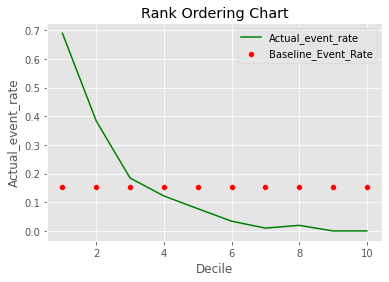

In [15]:
ax = sns.lineplot(x="Decile", y="Actual_event_rate", data=rank_df,color='green').set_title('Rank Ordering Chart')
ax = sns.scatterplot( x="Decile", y="Baseline_Event_Rate", data=rank_df,color='red')
ax.legend(['Actual_event_rate', 'Baseline_Event_Rate'])
plt.show()

## 8  The Lift Chart

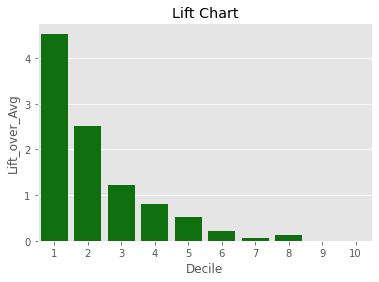

In [16]:
ax = sns.barplot( x="Decile", y="Lift_over_Avg", data=rank_df,color='green').set_title('Lift Chart')

## 9  The Gains Chart (Lorenz Curve)

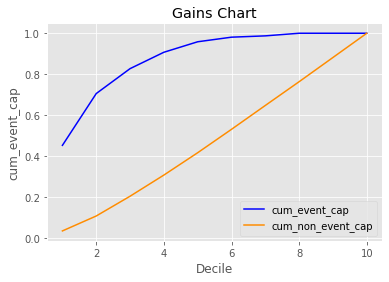

In [17]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=rank_df,color='blue').set_title('Gains Chart')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=rank_df,color='darkorange')
ax.legend(['cum_event_cap', 'cum_non_event_cap'])
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

# 3 Steps to Boost Marketing Campaign 

## Step 1: Find the Target Audience

### From our earlier Decile analysis, we can see that the customers with higher repsonse rate are in the first and second decile. So the first two decile, make the top 20% of customers that are, most likely to generate high percentage of overall revenue. Hence focusing on them should be a top priority.

In [18]:
df['Predicted_Rank']=np.where(df['Prob_Rank']>=9,"Top 2","Bottom 8")
df['Predicted_Rank'].value_counts()

Bottom 8    1646
Top 2        412
Name: Predicted_Rank, dtype: int64

In [19]:
df_top2=df.loc[df['Predicted_Rank']=="Top 2",:]
df_top2.shape

(412, 32)

In [20]:
df_top2['Response'].value_counts()

1    221
0    191
Name: Response, dtype: int64

In [21]:
response_rate = 221/412 # response rate in top 2 deciles
print("The response rate in the top 2 decile is", int(round(response_rate*100, 0)),"%")

The response rate in the top 2 decile is 54 %


In [22]:
0.5364077/Y.mean() 
# 3.5% higher response rate, 80% reduction in marketing cost

Response    3.526923
dtype: float64

## Step 2: Segmentation of target audience 

### Customer Segementation is based on the campaign 'Response' for Recency(R), Frequency(F), and Monetary value(M) of the top 2 deciles.

### NOTE: We do not use RFM Analysis in the traditional way of setting scores and finding RFM score for each customer. Instead we use these 3 features for prioritization of target audience.

#### What is RFM?
   - RFM stands for Receny, Frequency, and Monetary value. RFM is a method used to analyze customer value. 

   - Receny: How recently did the customer purchase? or How much time has elapsed since a customer’s last activity or                        transaction with the brand?

   - Frequency: How often do they visit or how often do they purchase?

   - Monetary value: How much revenue we get from their visit or how much do they spend when they purchase?
   
   - customer segmentation, it helps marketers, to find, the best customers and customers that are most likely to respond to          campaigns
   
   
#### Why RFM?
   - From our best model, we know that, "Recency" is a important feature. And customers with most recent purchase, may show more      response towards promotions.
   
   - More "frequently" the customer buys, the more engaged and satisfied they are.
   
   - The "Monetary" value differentiates heavy spenders from low spenders. 
  
  

## Frequency
- The **engagement** of the customers are segmented by the following **quantile values**
   - 0 - 75 : Low engagement
   - 76 - 100 : High engagement

In [23]:
# To find the total number of purchases made by a customer
df_top2['Total_Purchases'] = df_top2[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)
df_top2['Total_Purchases'].describe()

count    412.00000
mean      15.92233
std        6.93198
min        1.00000
25%       11.00000
50%       17.00000
75%       21.00000
max       32.00000
Name: Total_Purchases, dtype: float64

In [24]:
df_top2['Engagement']=np.where(df_top2['Total_Purchases']<df_top2['Total_Purchases'].quantile(0.75),"Low","High")

## Recency
- The recency of the customers are segmented by the following **quantile values**
   - 0 - 75 : Least recent customers
   - 76 - 100 : Most recent customers

In [25]:
df_top2['Recent']=np.where(df_top2['Recency']<df_top2['Recency'].quantile(0.75),"Least","Most") 

In [26]:
pd.crosstab(index=df_top2['Engagement'], columns=df_top2['Recent'],values=df_top2['Response'],aggfunc='mean')

Recent,Least,Most
Engagement,,
High,0.520548,0.641026
Low,0.521186,0.546875


## Monetary Value
- The monetary of the customers are segmented by the following **quantile values**
   - 0 - 75 : High spend 
   - 76 - 100 : Low spend

In [27]:
# To find the total amount spend by each customer
df_top2['Total_Spend']=df_top2[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df_top2['Total_Spend'].describe()

count     412.000000
mean     1018.242718
std       707.969891
min        12.000000
25%       356.250000
50%      1085.000000
75%      1659.000000
max      2525.000000
Name: Total_Spend, dtype: float64

In [28]:
df_top2['spend_level']=np.where(df_top2['Total_Spend']<df_top2['Total_Spend'].quantile(0.75),"Low","High")
df_top2['spend_level'].value_counts()

Low     309
High    103
Name: spend_level, dtype: int64

In [29]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='mean')

Engagement,High,Low
spend_level,,
High,0.651163,0.633333
Low,0.507246,0.500000


In [30]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Recent'],values=df_top2['Response'],aggfunc='mean')

Recent,Least,Most
spend_level,,
High,0.614286,0.696970
Low,0.493724,0.528571


## Segmentation
### The customers are segmented based on the response rate in each segment. 

In [31]:
customer_segment = pd.crosstab(df_top2['spend_level'],[df_top2['Engagement'],df_top2['Recent']], rownames=['spend'], colnames=['Engagement', 'Recent'],values=df_top2['Response'],aggfunc='mean')
customer_segment

Engagement      High                 Low          
Recent         Least      Most     Least      Most
spend                                             
High        0.612903  0.750000  0.615385  0.666667
Low         0.452381  0.592593  0.502538  0.488372

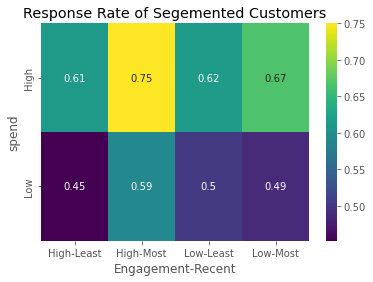

In [32]:
sns.heatmap(customer_segment, annot=True, cmap='viridis')
plt.title("Response Rate of Segemented Customers")
plt.show()

### <font color='blue'>NOTE: Irrespective of different features associated with 'Spend', the high spenders show higher reponse rate.</font>

In [33]:
pd.crosstab(df_top2['spend_level'],[df_top2['Engagement'],df_top2['Recent']], rownames=['spend'], colnames=['Engagement', 'Recent'],values=df_top2['Response'], aggfunc='count')

Engagement  High        Low     
Recent     Least Most Least Most
spend                           
High          31   12    39   21
Low           42   27   197   43

### Prioritization 

### The best 20% of customers are divided into different groups. The segment with highest  response rate is given the first priority and the lowest response rate is given the last priority.


### High Spenders 

In [34]:
# 1st Priority customers - High Spenders, High Engagement, Most Recent
priority_1_df = df_top2.loc[(df_top2['spend_level']=='High') & (df_top2['Engagement']=='High') & (df_top2['Recent']=='Most')]
priority_1_df.shape

(12, 37)

In [35]:
# 2nd Priority customers - High Spenders, Low Engagement, Most Recent
priority_2_df=df_top2.loc[(df_top2['spend_level']=='High') & (df_top2['Engagement']=='Low') & (df_top2['Recent']=='Most')]
priority_2_df.shape

(21, 37)

In [36]:
# 3rd Priority customers - High Spenders, High & Low Engagement, Not Recent
priority_3_1_df = df_top2.loc[(df_top2['spend_level']=='High') & (df_top2['Recent']=='Least')& (df_top2['Engagement']=='High')]
priority_3_2_df = df_top2[(df_top2['spend_level']=='High') & (df_top2['Recent']=='Least')& (df_top2['Engagement']=='Low')]
priority_3_df = pd.concat([priority_3_1_df, priority_3_2_df])
priority_3_df.shape

(70, 37)

### Low Spenders

In [37]:
# 4th Priority customers - Low Spenders, High Engagement, Most Recent
priority_4_df=df_top2.loc[(df_top2['spend_level']=='Low') & (df_top2['Engagement']=='High') & (df_top2['Recent']=='Most')]
priority_4_df.shape

(27, 37)

In [38]:
# 5th Priority customers - Low Spenders, Low Engagement, Most & Least Recent
priority_5_1_df=df_top2.loc[(df_top2['spend_level']=='Low') & df_top2['Recent'] & (df_top2['Engagement']=='Low')]
priority_5_2_df=df_top2.loc[(df_top2['spend_level']=='Low') & (df_top2['Recent']=='Least') & (df_top2['Engagement']=='High')]
priority_5_df = pd.concat([priority_5_1_df, priority_5_2_df])
priority_5_df.shape

(282, 37)

# Step 3: Solution
- Find the products for which offers can be given for each segments.

In [39]:
spend_cat_priority1=priority_1_df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
spend_avg = spend_cat_priority1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            1049.916667
MntMeatProducts      606.750000
MntGoldProds         103.333333
MntFishProducts       90.500000
MntSweetProducts      83.250000
MntFruits             58.750000
dtype: float64

In [40]:
spend_cat_priority2=priority_2_df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
spend_avg = spend_cat_priority2.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            997.714286
MntMeatProducts     656.238095
MntFishProducts      78.809524
MntGoldProds         76.666667
MntFruits            73.000000
MntSweetProducts     63.142857
dtype: float64

In [41]:
spend_cat_priority3=priority_3_df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
spend_avg = spend_cat_priority3.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            894.685714
MntMeatProducts     696.642857
MntFishProducts     102.357143
MntGoldProds         81.142857
MntFruits            71.285714
MntSweetProducts     67.414286
dtype: float64

In [42]:
spend_cat_priority4=priority_4_df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
spend_avg = spend_cat_priority4.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            699.703704
MntMeatProducts     263.000000
MntGoldProds         91.333333
MntFishProducts      76.518519
MntSweetProducts     53.629630
MntFruits            38.962963
dtype: float64

In [43]:
spend_cat_priority5=priority_5_df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
spend_avg = spend_cat_priority5.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            349.308511
MntMeatProducts     169.014184
MntGoldProds         58.117021
MntFishProducts      33.372340
MntFruits            28.195035
MntSweetProducts     27.868794
dtype: float64

# Recommendations

1) For the following products offers can be provided, namely, 
   wine, meat, gold, fish.
    
2) Send personalized notifications about discounts/offers to high spenders.

3) Reward with offers for 'Refer a Friend'

4) Send personalized email/message to encourage them to buy again.

5) Loyalty Card program to gain points for multiple purchases that can be converted to discounts.

--------------------------------------------------------------------------------------------------------------------------------

                *******************************************************************************